<a href="https://colab.research.google.com/github/azamchocs/4th-semester/blob/main/C2_CPU_Performance_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smartphone Central Processing Unit Performance benchmark.



## Business Understanding.

### Business Objective.

  The reasoning behind this business research is to compare all of the currently existing smartphone's Central Processing Unit by their score in specific performance/bench test on GeekBench, While also providing a comprehensive overview of the smartphone's CPU.

### Assess Situation.

  The situation that results in this research being started is due to lack of information that can be used to compare phone and as per the information provided by the data source.

  ###### "Benchmarks allow for easy comparison between multiple devices by scoring their performance on a standardized series of tests, and they are useful in many instances: When buying a new phone or tablet"

### Data Mining Goals

  The ultimate objective of this data mining research is to provide predictive insights or recommendations to assist individuals in selecting smartphones that align with their preferences and requirements.

### Project Plan

   The project encompasses phases such as data collection, preprocessing, feature engineering, model development, and validation. By employing machine learning algorithms and evaluating model performance, the project seeks to generate actionable recommendations for smartphone selection, which will be documented and shared with stakeholders.

# Import Library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore

# Data Understanding

## Collect Initial Data

The dataset utilized in this research was sourced from Kaggle, a prominent platform for sharing datasets and conducting data science projects. The specific dataset can be accessed through the following [link](https://www.kaggle.com/datasets/alanjo/smartphone-processors-ranking.).

In [ ]:
df1 = pd.read_csv('smartphone_cpu_stats.csv')

print("Data 1 : ")
display(df1)
print()

df2 = pd.read_csv('ML_ALL_benchmarks.csv')

print("\nData 2 : ")
display(df2)
print()

df3 = pd.read_csv('antutu_android_vs_ios_v4.csv')

print("\nData 3 : ")
display(df3)

Data 1 : 


,rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,(2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,(1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,(1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,(2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,(1+3+4),2995,Adreno 660
...,...,...,...,...,...,...,...,...,...,...
120,121,MediaTek,Helio P23,153,851,109039,8,(4+4),2300,Mali-G71 MP2
121,122,Samsung,Exynos 7884B,246,894,103821,8,(2+6),1560,Mali-G71 MP2
122,123,HiSilicon,Kirin 659,193,878,120426,8,(4+4),2360,Mali-T830 MP2
123,124,Samsung,Exynos 7420,259,873,95445,8,(4+4),2100,Mali-T760 MP8




Data 2 : 


,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656
...,...,...,...,...,...,...,...,...
183,Samsung Galaxy Note FE,Samsung,Exynos 8890,8,1300,133,400,71
184,Huawei Nexus 6P,Qualcomm,Snapdragon 810,8,1555,85,111,71
185,LG Nexus 5X,Qualcomm,Snapdragon 808,6,1440,78,75,68
186,LG V30,Qualcomm,Snapdragon 835,8,1900,146,504,66




Data 3 : 


,Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch) (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch) (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5 (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7 (S-8 Gen 1 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 Pro (M-9000 8/128),244999,390026,169449,182367,986840
...,...,...,...,...,...,...
174,Infinix Hot 11S (M-G88 6/128),67728,61200,44181,82926,256035
175,Redmi 10 (M-G88 6/128),62902,58096,41767,80297,243061
176,Galaxy A51 (E-9611 6/128),55203,62849,45941,67989,231982
177,Galaxy M31 (E-9611 6/128),55772,61407,46470,67868,231515


# Desribe Data

## Basic understanding of information



In [ ]:
dataframes = [df1, df2, df3]

for idx, df in enumerate(dataframes, start=1):
    num_rows, num_columns = df.shape
    print(f"Dataframe {idx}:")
    print("Number of rows:", num_rows)
    print("Number of columns:", num_columns)
    print()

Dataframe 1:
Number of rows: 125
Number of columns: 10

Dataframe 2:
Number of rows: 188
Number of columns: 8

Dataframe 3:
Number of rows: 179
Number of columns: 6



We're going to be focusing on Dataframe 1, which pertains to smartphone CPU statistics. However, before delving into that, let's delve into detailed information regarding the other dataframes.

Dataframe 1 contains statistical information related to smartphone central processing units (CPUs), detailing various performance metrics. Dataframe 2 encompasses Machine Learning (ML) benchmarks across a comprehensive range of tasks and applications. Lastly, Dataframe 3 presents comparative data between Android and iOS devices using the Antutu benchmark version 4, focusing on various performance aspects.

## Advanced information

As we'll be honing in on Dataframe 1, let's break down what each column represents.

In [ ]:
# Assuming df is your DataFrame
columns_list = df1.columns.tolist()
print("Columns present in the DataFrame:")
print(columns_list)

Columns present in the DataFrame:
['rank', 'company', 'cpuName', 'geekbenchSingle', 'geekbenchMulti', 'antutu9', 'coreCount', 'coreConfig', 'clockSpeed', 'gpu']


As evident, there are 10 columns, each with distinct details outlined below :
1. 'rank'            : Numerical data (int)
2. 'company'         : Categorical (str)
3. 'cpuName'         : Categorical (str)
4. 'geekbenchSingle' : Numerical data (float or int)
5. 'geekbenchMulti'  : Numerical data (float or int)
6. 'antutu9'         : Numerical data (float or int)
7. 'coreCount'       : Numerical data (int)
8. 'coreConfig'      : Categorical (str)
9. 'clockSpeed'      : Numerical data (float)
10. 'gpu'            : Categorical (str)

## Descriptive Statistical Information

In [ ]:
descriptive_statistical = df.describe()
display(descriptive_statistical)

,CPU,GPU,MEM,UX,Total Score
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,164315.430168,226573.279330,98529.592179,119318.597765,6.087365e+05
std,55469.900787,123333.451434,34251.401138,27252.848090,2.267753e+05
min,55203.000000,49783.000000,39208.000000,52768.000000,2.250970e+05
25%,118644.500000,132581.000000,68063.000000,98424.500000,4.195495e+05
50%,160554.000000,219809.000000,97571.000000,118275.000000,6.086710e+05
75%,196729.500000,299041.500000,120661.000000,140160.000000,7.627725e+05
max,351212.000000,741383.000000,183160.000000,182367.000000,1.429728e+06


Count: This indicates the number of non-null observations in the column, providing insight into the completeness of the data.

Mean: The mean value represents the average of the data points in the column, giving an indication of the central tendency.

Standard Deviation (Std): The standard deviation measures the dispersion or spread of the data around the mean, providing information about the variability in the data.

Minimum Value: This is the smallest value observed in the column, representing the lower bound of the data range.

25th Percentile (1st Quartile): This value indicates the data point below which 25% of the data fall, providing insight into the distribution of lower values in the dataset.

Median (50th Percentile, 2nd Quartile): The median is the middle value of the dataset when arranged in ascending order, providing a measure of central tendency that is robust to outliers.

75th Percentile (3rd Quartile): This value indicates the data point below which 75% of the data fall, providing insight into the distribution of higher values in the dataset.

Maximum Value: This is the largest value observed in the column, representing the upper bound of the data range.

## Exploratory Data Analisis



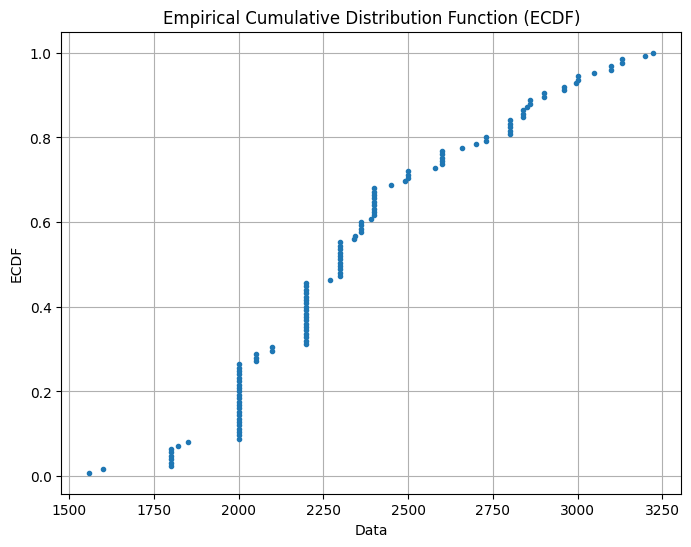

In [ ]:
df = pd.read_csv('smartphone_cpu_stats.csv')
data = df['clockSpeed']
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Compute ECDF
x, y = ecdf(data)

# Plot ECDF
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Data')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.show()

The empirical cumulative distribution function (ECDF) graph reveals a notable abundance of phone CPUs operating at a clock speed of 2000, while the frequency decreases significantly as the clock speed increases.

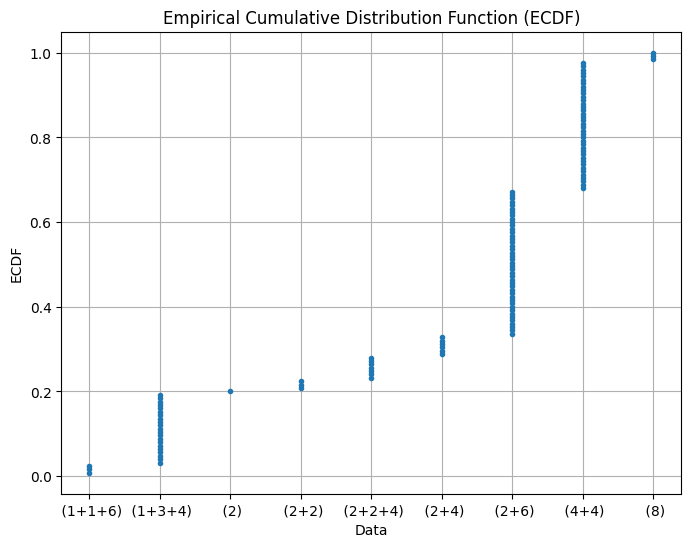

In [ ]:
df = pd.read_csv('smartphone_cpu_stats.csv')
data = df['coreConfig']
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Compute ECDF
x, y = ecdf(data)

# Plot ECDF
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Data')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.show()

The graph illustrates that while the core count remains largely consistent across CPUs, there is variability in core configurations. These configurations range from 1+1+6 to 4+4 or even 8 cores operating individually.

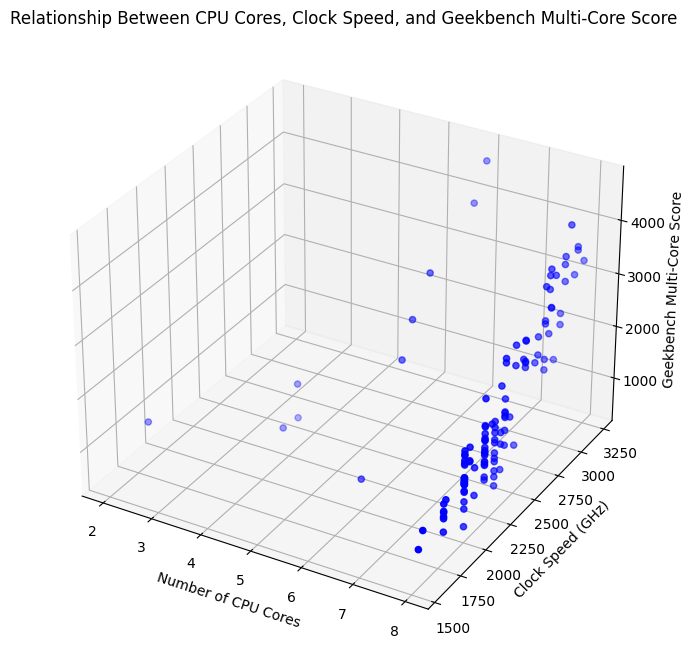

In [ ]:
df = pd.read_csv('smartphone_cpu_stats.csv')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['coreCount'], df['clockSpeed'], df['geekbenchMulti'], c='b', marker='o')

# Set labels and title
ax.set_xlabel('Number of CPU Cores')
ax.set_ylabel('Clock Speed (GHz)')
ax.set_zlabel('Geekbench Multi-Core Score')
ax.set_title('Relationship Between CPU Cores, Clock Speed, and Geekbench Multi-Core Score')

plt.show()

Dataset has multiple entries for the same number of CPU cores, taking the mean can help reduce the impact of outliers or variability in the data, providing a smoother representation of the relationship.

The depicted graph emphasizes that a high core count alone, such as 8 cores, does not guarantee a high GeekbenchMulti score if the clock speed remains slow, such as 2000MHz. The relationship between core count and clock speed significantly influences CPU performance on benchmark tests. Consequently, an increase in both core count and clock speed tends to elevate the GeekbenchMulti score.

# Verify Data Quality

## Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 rank               0
company            0
cpuName            0
geekbenchSingle    0
geekbenchMulti     0
antutu9            0
coreCount          0
coreConfig         0
clockSpeed         0
gpu                0
dtype: int64


The analysis has revealed the absence of missing values within the existing columns, leading to the conclusion that no null data has been detected.

## Outlier Values

In [ ]:
df = pd.read_csv('smartphone_cpu_stats.csv')

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each numeric column
z_scores = zscore(numeric_columns)

# Define threshold for identifying outliers
threshold = 3

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Print rows with outliers
if outliers.any():
    print("Outlier values:")
    print(df[outliers])
else:
    print("No outliers found.")

Outlier values:
   rank   company             cpuName  geekbenchSingle  geekbenchMulti  \
0     1     Apple          A15 Bionic             1727            4688   
1     2  MediaTek      Dimensity 9000             1269            4267   
2     3  Qualcomm  Snapdragon 8 Gen 1             1213            3765   
3     4     Apple          A14 Bionic             1581            4093   

   antutu9  coreCount coreConfig  clockSpeed         gpu  
0   794346          6      (2+4)        3223   Apple GPU  
1  1017817          8    (1+3+4)        3050   Mali-G710  
2  1028349          8    (1+3+4)        3000  Adreno 730  
3   730211          6      (2+4)        3100   Apple GPU  


As evident from the information provided above, the data points highlighted are classified as outliers.

## Duplicated Values

In [ ]:
df.duplicated()

# Check for duplicated values
duplicated_values = df[df.duplicated()]
print("Duplicated values :\n", duplicated_values)

Duplicated values :
 Empty DataFrame
Columns: [rank, company, cpuName, geekbenchSingle, geekbenchMulti, antutu9, coreCount, coreConfig, clockSpeed, gpu]
Index: []


This demonstrates that there are no duplicated rows within any of the index, which correspond to the columns they represent.

## Inconsistent Values/Noise

I have not identified any values that appear inconsistent or noisy, indicating that the data exhibits consistency across all rows.